In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Exercise 1: K-means Clustering on Customer Segmentation
### Objective: Use K-means clustering to segment a dataset of customer purchases and analyze the results.
### Dataset
- CustomerID: Unique identifier for each customer

- Age: Age of the customer

- AnnualIncome (k$): Annual income of the customer in thousands of dollars

- SpendingScore (1-100): Score assigned by the mall based on customer behavior and spending nature

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Standardize the data and apply Kmeans clustering with k=5

In [6]:
import os 
os.environ["OMP_NUM_THREADS"] ="1"
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## Run the following cell to visualize the clusters
##### Original data in df and the scaled features in X_scaled the predicted clusters are added to the original dataframe as a named 'Cluster'.

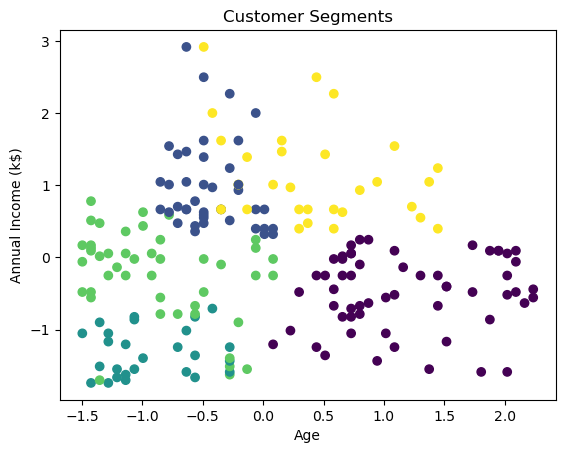

In [7]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segments')
plt.show()

## Reults Analysis (Run the following cell and analize the results)

In [8]:
# Calculate centroids
centroids = kmeans.cluster_centers_
print("Centroids of each cluster:\n", centroids)

# Provide insights into each cluster
for i in range(5):
    print(f"Cluster {i+1}:")
    print(df[df['Cluster'] == i].describe())


Centroids of each cluster:
 [[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]
Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   58.000000  58.000000           58.000000               58.000000   
mean    68.775862  55.275862           47.620690               41.706897   
std     31.021805   8.571256           13.413567               15.697814   
min      9.000000  40.000000           19.000000                3.000000   
25%     45.500000  49.000000           39.250000               37.250000   
50%     69.500000  53.000000           48.500000               46.000000   
75%     92.500000  63.750000           59.750000               52.000000   
max    120.000000  70.000000           67.000000               60.000000   

       Cluster  
count     58.0  
mean       0.0  
std        0.0  
min        0

### Analysis
Cluster 1: Younger customers with high spending scores.

Cluster 2: Older customers with moderate spending scores.

Cluster 3: Customers of varying ages with low spending scores.

Cluster 4: Middle-aged customers with high annual income and spending scores.

Cluster 5: Younger customers with moderate annual income and spending scores.

# End of Exercise 1
****************************************************

# Exercise 2: 
### Train a kmeans cluster on the 'Mall_Customers.csv' data using k=1,2,3,4,5,6,7,8,9, and 10.
### Plot Inertia vs. k

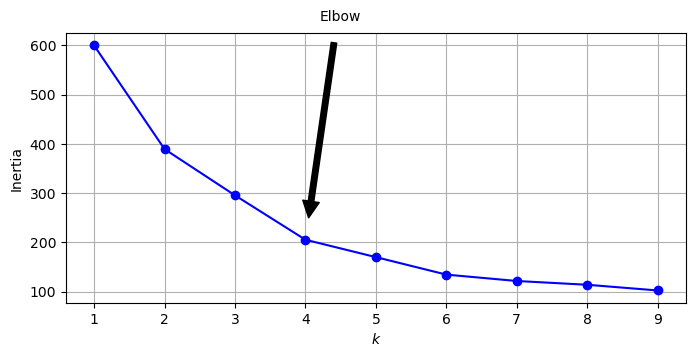

In [9]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
# plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

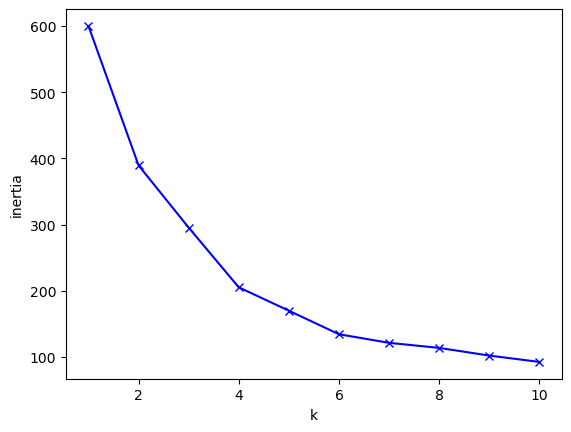

In [10]:
AllKmeans = []
inertias = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  AllKmeans.append(kmeans)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11),inertias,'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# End of Exercise 2
****************************************************

# Exercise 3: 
### Use the trained kmeans models from exercise 2 and calculate Silhouette Score for each of them.
### Plot Silhouette Score vs. k

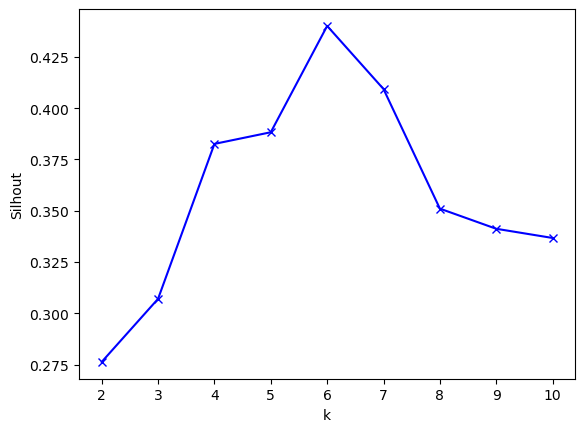

In [11]:
from sklearn.metrics import silhouette_score
Silhouts = []
for model in AllKmeans[1:]:
  Silhouts.append(silhouette_score(X,model.labels_))

plt.plot(range(2,11),Silhouts,'bx-')
plt.xlabel('k')
plt.ylabel('Silhout')
plt.show()

## Create a new kmeans cluster based on your observation of  the Silhout curve.

In [12]:
kmeans2 = KMeans(n_clusters=6, random_state=42)
df['Cluster2'] = kmeans.fit_predict(X_scaled)

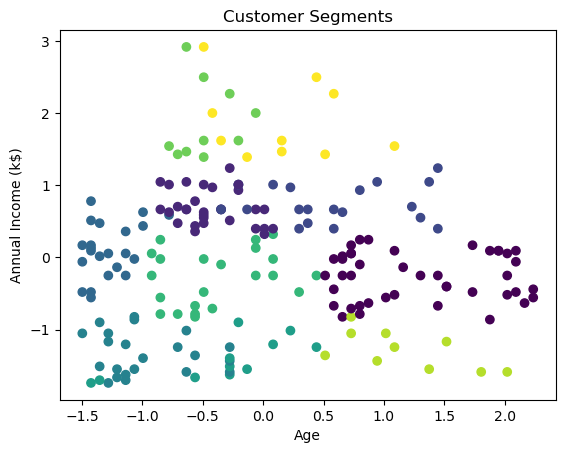

In [13]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster2'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segments')
plt.show()

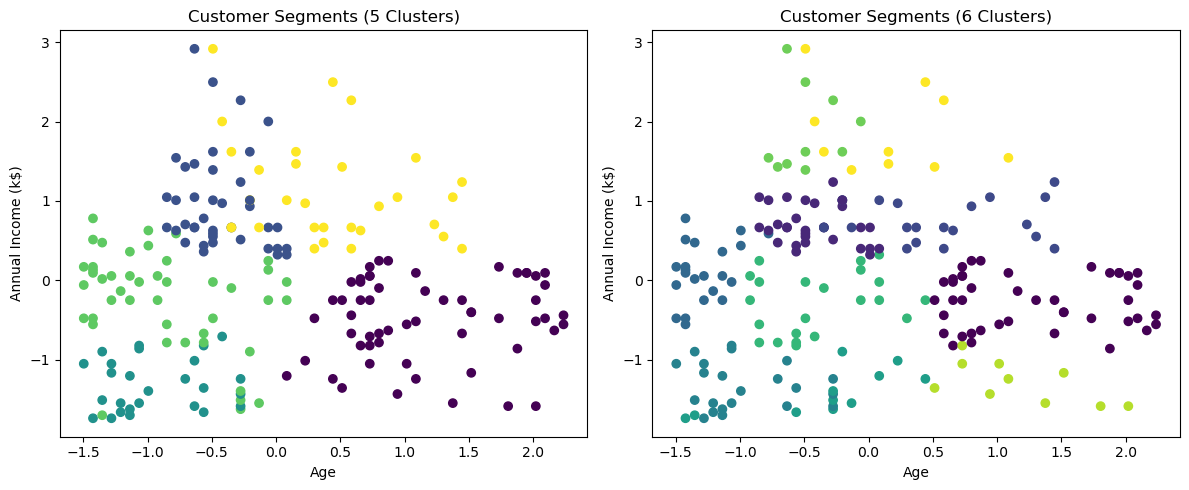

In [14]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first figure
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income (k$)')
ax1.set_title('Customer Segments (5 Clusters)')


# Plot the second figure
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster2'], cmap='viridis')
ax2.set_xlabel('Age')
ax2.set_ylabel('Annual Income (k$)')
ax2.set_title('Customer Segments (6 Clusters)')


# Show the plots
plt.tight_layout()
plt.show()


# End of Exercise 3
****************************************************

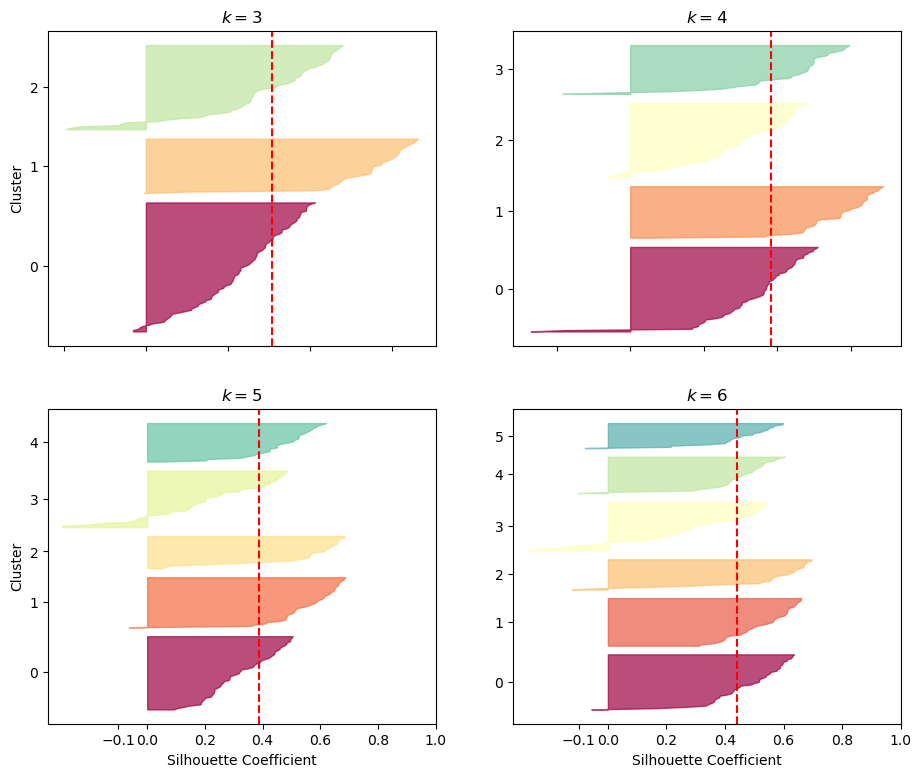

In [15]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=Silhouts[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()